In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

### Loading the Data

1) Number of features

2) Target variable

3) Data type of each feature

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
df.duplicated().sum()

np.int64(0)

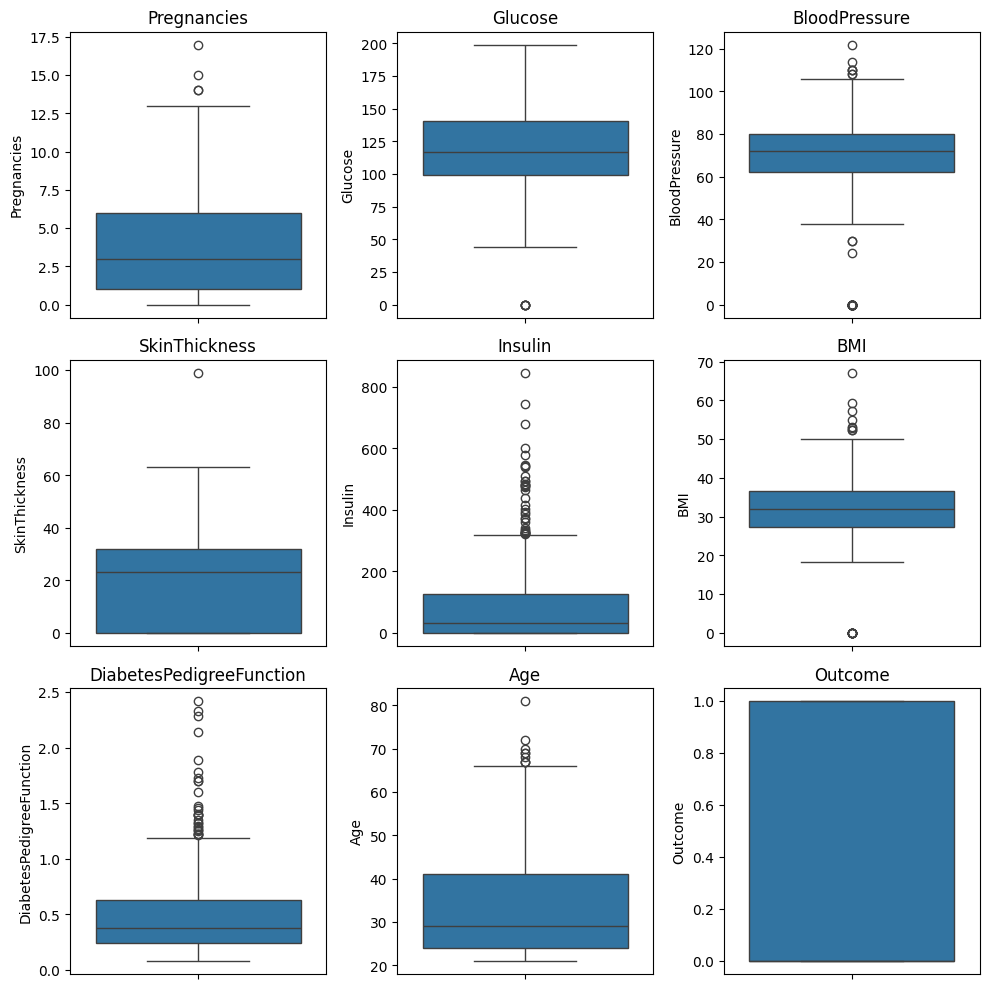

In [6]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## *Handle* :

1) Missing values (if any)

2) Feature scaling (StandardScaler / MinMaxScaler)

In [7]:
from sklearn.impute import KNNImputer
# 2. Define columns where 0 is invalid
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 3. Replace 0 with NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# 4. Initialize and Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df)

# 5. Convert the resulting NumPy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

df = df_imputed
# Check the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


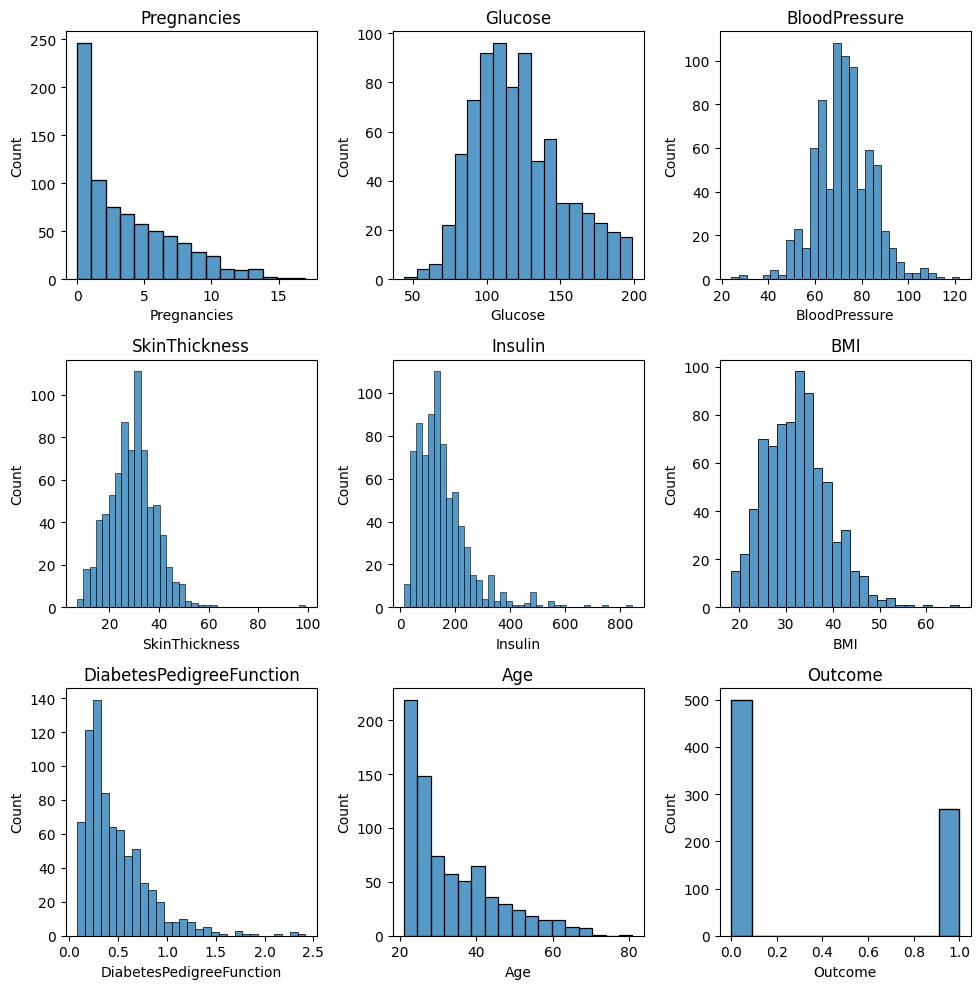

In [9]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col])
    plt.title(col)
plt.tight_layout()

<Axes: >

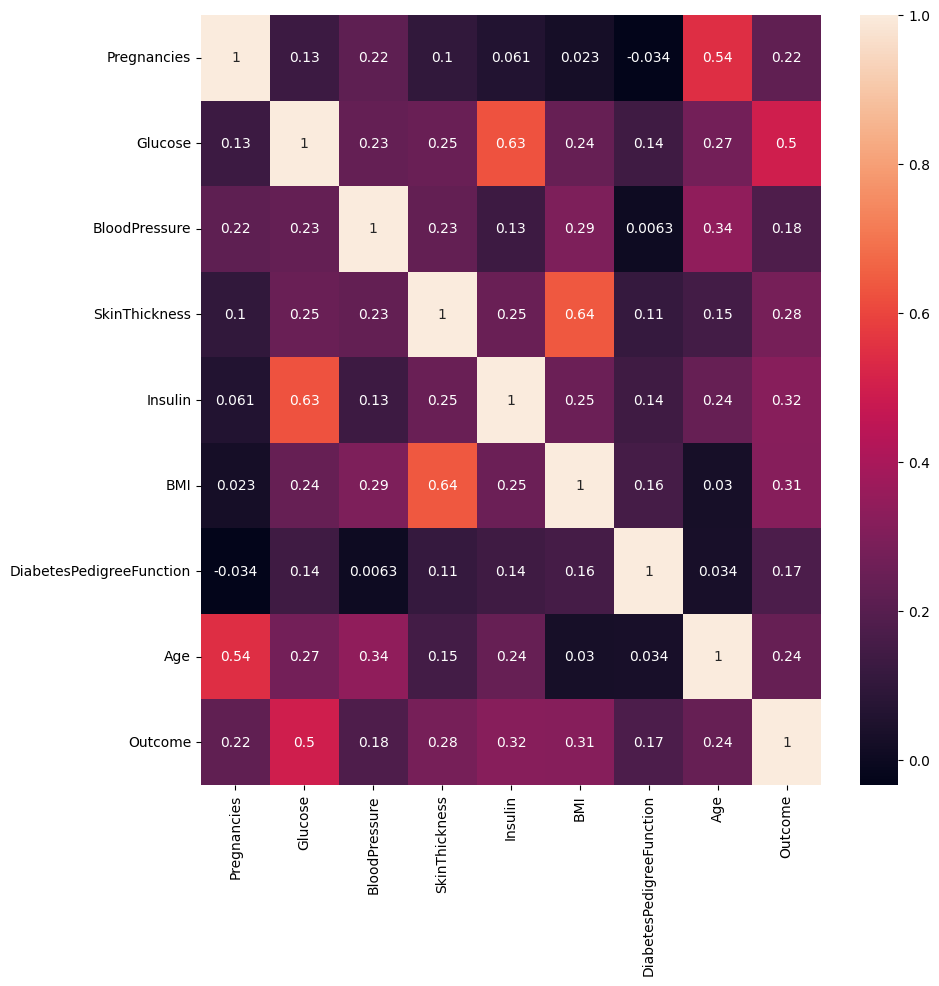

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [11]:
# Print top correlations with Outcome
print("\nTop Correlations with Outcome:")
print(df.corr()['Outcome'].sort_values(ascending=False))


Top Correlations with Outcome:
Outcome                     1.000000
Glucose                     0.495853
Insulin                     0.320151
BMI                         0.313882
SkinThickness               0.279530
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.176665
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


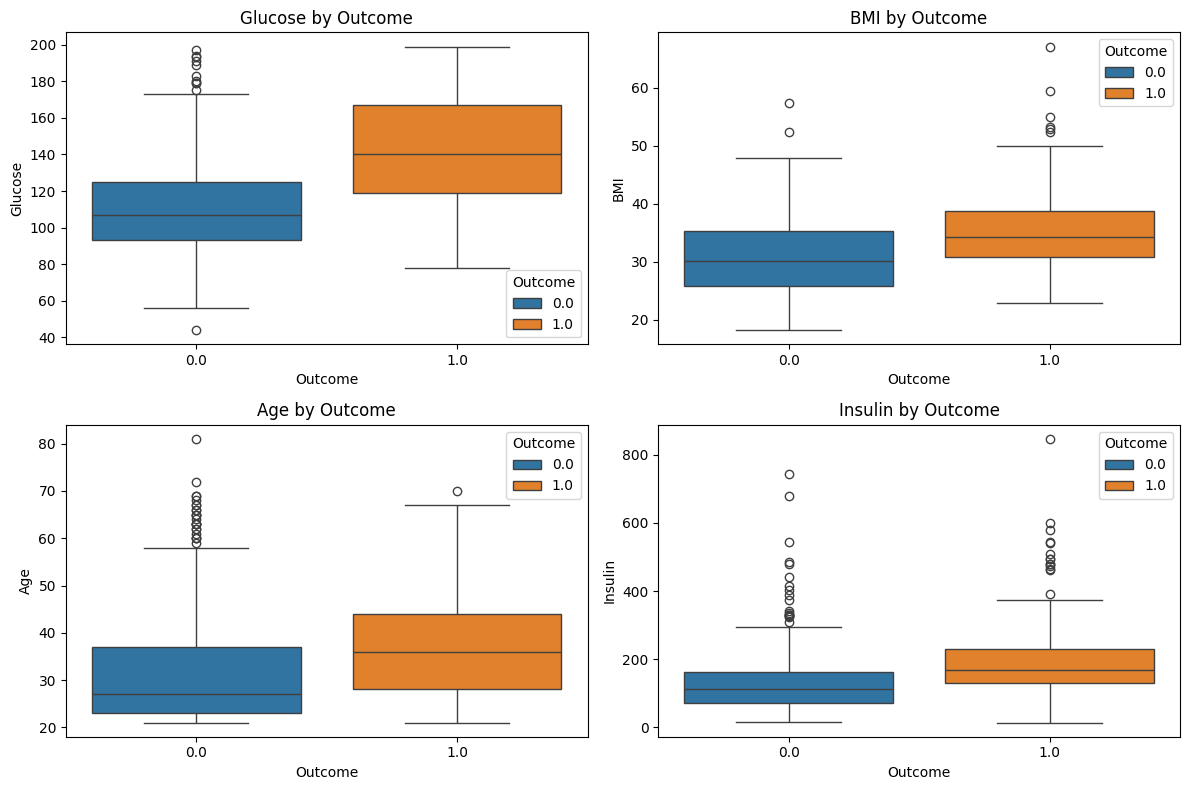

In [12]:
features_to_plot = ['Glucose', 'BMI', 'Age', 'Insulin']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Outcome', y=col, data=df, hue='Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()

Split data into:

1) Train (70%)

2) Validation (15%)

3) Test (15%)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler

# Separate Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling (RobustScaler)
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 4. Split Data (70% Train, 15% Val, 15% Test)
# First Split: 70% Train, 30% Temp (Val + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

# Second Split: Divide the 30% Temp equally into Val and Test (15% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df):.1%})")
print(f"Validation Set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df):.1%})")
print(f"Test Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df):.1%})")
print("Original Training Set Distribution:")
print(y_train.value_counts())

# 5. Balance the Training Set ONLY
train_data = pd.concat([X_train, y_train], axis=1)
majority = train_data[train_data.Outcome == 0]
minority = train_data[train_data.Outcome == 1]

# Upsample minority
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

train_balanced = pd.concat([majority, minority_upsampled])
X_train = train_balanced.drop('Outcome', axis=1)
y_train = train_balanced['Outcome']

print(f"Balanced Training Set: {X_train.shape[0]} samples (Balanced 50/50)")

print("\nBalanced Training Set Distribution:")
print(y_train.value_counts())

Training Set: 537 samples (69.9%)
Validation Set: 115 samples (15.0%)
Test Set: 116 samples (15.1%)
Original Training Set Distribution:
Outcome
0.0    350
1.0    187
Name: count, dtype: int64
Balanced Training Set: 700 samples (Balanced 50/50)

Balanced Training Set Distribution:
Outcome
0.0    350
1.0    350
Name: count, dtype: int64


## **Build an ANN Model**

Build a baseline ANN using Keras Sequential API:

1) Input layer

2) At least 2 hidden layers

3) Output layer appropriate to task

4) Compile the model with: One optimizer,One loss function

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Create the model
model = Sequential()

# Input Layer
model.add(Dense(32, activation='relu', input_dim=8)) # Corrected input_dim

# Dropout
model.add(Dropout(0.25))
# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## **Train and report** :

1) Training loss

2) Validation loss

In [24]:
# Train with Validation Data
history = model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=20,
              batch_size=10,
              verbose=0)

# Evaluate on Test Set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nTraining Loss:", history.history['loss'][-1])      # Training Loss
print("Validation Loss:", history.history['val_loss'][-1])  # Validation Loss

Test Accuracy: 0.7672

Training Loss: 0.384879469871521
Validation Loss: 0.5708590745925903


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        75
         1.0       0.71      0.59      0.64        41

    accuracy                           0.77       116
   macro avg       0.75      0.73      0.73       116
weighted avg       0.76      0.77      0.76       116


--- Confusion Matrix ---
[[65 10]
 [17 24]]


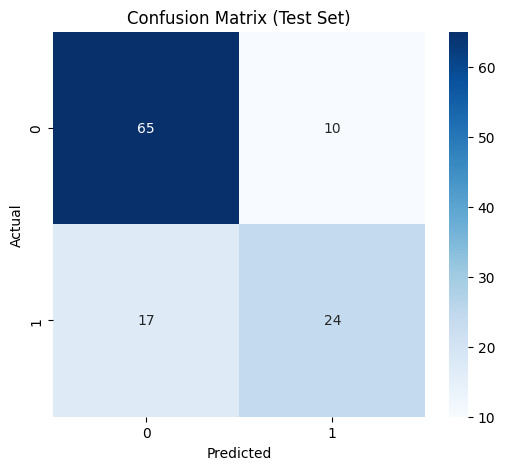

In [25]:
# Evaluate on Test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Report
print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot CM
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


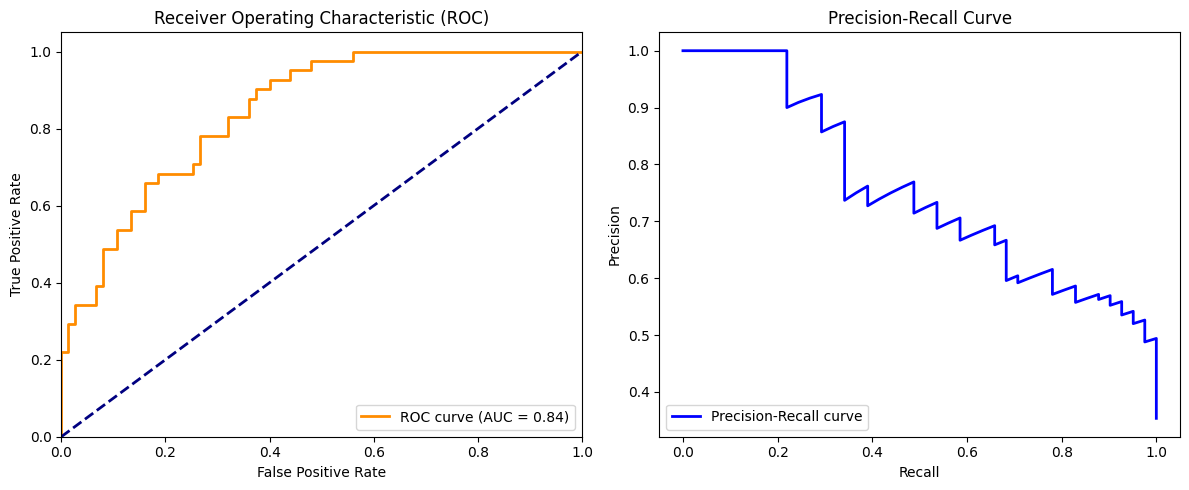

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Predict probabilities
y_pred_prob = model.predict(X_test).ravel()

# Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plotting
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


## *Hyperparameter Tuning using Optuna*

1) Tune at least 4 hyperparameters, such as:

2) Number of hidden layers

3) Activation function

4) Optimizer, Learning rate, Batch size

## *Requirements*:

1) Use Optuna

2) Run at least 20 trials

3) Save best parameters

4) Retrain final model using best configuration

In [27]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 6.9 MB/s eta 0:00:00


In [28]:
import optuna
import tensorflow as tensorflow
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping

def objective(trial):
    # --- 1. Define Hyperparameters to Tune ---

    # A. Number of hidden layers (1 to 3 layers)
    n_layers = trial.suggest_int('n_layers', 1, 3)

    # B. Activation function (Choose between ReLU, Tanh, or ELU)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'elu'])

    # C. Learning Rate (Log scale is best for LR: 0.0001 to 0.01)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # D. Optimizer (Choose between Adam, RMSprop, or SGD)
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])

    # E. Number of Neurons per layer (16 to 128)
    units = trial.suggest_int('units', 16, 128, step=16)

    # --- 2. Build the Model ---
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],))) # Use your data's shape

    # Loop to add the selected number of hidden layers
    for i in range(n_layers):
        model.add(layers.Dense(units, activation=activation))
        model.add(layers.Dropout(0.25)) # Keeping our useful dropout!

    # Output layer (Binary classification assumed based on previous steps)
    model.add(layers.Dense(1, activation='sigmoid'))

    # --- 3. Compile with selected Optimizer & LR ---
    if optimizer_name == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # --- 4. Train with selected Batch Size ---
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

    # Use Early Stopping to speed up bad trials
    callback = EarlyStopping(monitor='val_loss', patience=3)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20, # Keep epochs low for tuning trials
        batch_size=batch_size,
        callbacks=[callback],
        verbose=0 # Silence the output to keep log clean
    )

    # Return the best validation accuracy achieved in this trial
    return max(history.history['val_accuracy'])

In [29]:
# Create a study object and specify the direction is 'maximize' (higher accuracy is better)
study = optuna.create_study(direction='maximize')

# Run 20 trials
print("Starting Hyperparameter Tuning...")
study.optimize(objective, n_trials=20)

print("-" * 50)
print("Tuning Complete.")

[I 2025-12-23 13:18:50,447] A new study created in memory with name: no-name-5206c2ec-fbb5-4505-872a-df63c7eab03c


Starting Hyperparameter Tuning...


[I 2025-12-23 13:18:57,888] Trial 0 finished with value: 0.747826099395752 and parameters: {'n_layers': 2, 'activation': 'tanh', 'learning_rate': 0.00035239071789967683, 'optimizer': 'adam', 'units': 32, 'batch_size': 32}. Best is trial 0 with value: 0.747826099395752.
[I 2025-12-23 13:19:02,076] Trial 1 finished with value: 0.643478274345398 and parameters: {'n_layers': 3, 'activation': 'tanh', 'learning_rate': 0.00299686393665834, 'optimizer': 'sgd', 'units': 16, 'batch_size': 64}. Best is trial 0 with value: 0.747826099395752.
[I 2025-12-23 13:19:10,563] Trial 2 finished with value: 0.7565217614173889 and parameters: {'n_layers': 3, 'activation': 'relu', 'learning_rate': 0.0010327511407104341, 'optimizer': 'adam', 'units': 112, 'batch_size': 16}. Best is trial 2 with value: 0.7565217614173889.
[I 2025-12-23 13:19:13,338] Trial 3 finished with value: 0.7217391133308411 and parameters: {'n_layers': 1, 'activation': 'relu', 'learning_rate': 0.00460595527377853, 'optimizer': 'rmsprop', 

--------------------------------------------------
Tuning Complete.


In [30]:
# Get the best trial results
best_trial = study.best_trial

print(f"Best Trial Accuracy: {best_trial.value:.4f}")
print("Best Hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

Best Trial Accuracy: 0.7565
Best Hyperparameters:
  n_layers: 3
  activation: relu
  learning_rate: 0.0010327511407104341
  optimizer: adam
  units: 112
  batch_size: 16


In [38]:
# Extract best parameters
best_params = study.best_params

# 1. Rebuild the model structure using best_params
final_model = keras.Sequential()
final_model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

for i in range(best_params['n_layers']):
    final_model.add(layers.Dense(best_params['units'], activation=best_params['activation']))
    final_model.add(layers.Dropout(0.25))

final_model.add(layers.Dense(1, activation='sigmoid'))

# 2. Re-compile with best optimizer and LR
if best_params['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=best_params['learning_rate'])
else:
    opt = keras.optimizers.SGD(learning_rate=best_params['learning_rate'])

final_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# 3. Retrain on the data (You can use more epochs now!)
# Note: Use the 'batch_size' found by Optuna
final_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=best_params['batch_size'],
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6081 - loss: 0.6535 - val_accuracy: 0.6957 - val_loss: 0.5604
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7578 - loss: 0.4851 - val_accuracy: 0.7130 - val_loss: 0.5414
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7921 - loss: 0.4469 - val_accuracy: 0.7217 - val_loss: 0.5564
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7762 - loss: 0.4631 - val_accuracy: 0.7304 - val_loss: 0.5355
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7797 - loss: 0.4279 - val_accuracy: 0.7478 - val_loss: 0.5598
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8169 - loss: 0.4152 - val_accuracy: 0.7217 - val_loss: 0.5678
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7836 - loss: 0.4405 - val_accuracy: 0.7217 - val_loss: 0.5746
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8175 - loss: 0.4043 - val_accuracy: 0.7217 - v

In [39]:
# Extract best parameters
best_params = study.best_params

# Rebuild the model structure using best_params
final_model = keras.Sequential()
final_model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

for i in range(best_params['n_layers']):
    final_model.add(layers.Dense(best_params['units'], activation=best_params['activation']))
    final_model.add(layers.Dropout(0.25))

final_model.add(layers.Dense(1, activation='sigmoid'))

# Re-compile with best optimizer and LR
if best_params['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=best_params['learning_rate'])
else:
    opt = keras.optimizers.SGD(learning_rate=best_params['learning_rate'])

final_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

from sklearn.utils import compute_class_weight
import numpy as np

# Calculate Weights (Insert this BEFORE model.fit) ---
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(weights))
print(f"Using Class Weights: {class_weight_dict}")


# The Training Command (Add the argument here) ---
final_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=best_params['batch_size'],
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],

    # <--- THIS IS THE ONLY NEW LINE YOU NEED --->
    class_weight=class_weight_dict,

    verbose=1
)

Using Class Weights: {0: np.float64(1.0), 1: np.float64(1.0)}
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6430 - loss: 0.6437 - val_accuracy: 0.7043 - val_loss: 0.5565
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7732 - loss: 0.4670 - val_accuracy: 0.6957 - val_loss: 0.5206
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7787 - loss: 0.4648 - val_accuracy: 0.7478 - val_loss: 0.5499
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7724 - loss: 0.4718 - val_accuracy: 0.7130 - val_loss: 0.6497
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8048 - loss: 0.4100 - val_accuracy: 0.7130 - val_loss: 0.5264
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7965 - loss: 0.4501 - val_accuracy: 0.7478 - val_loss: 0.5828
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7912 - loss: 0.4414 - val_accuracy: 0.7130 - val_loss: 0.6040


## *Evaluation & Visualization*

Plot:

1) Training vs Validation Loss

2) Evaluate on test set:

3) Classification: Accuracy, Confusion Matrix

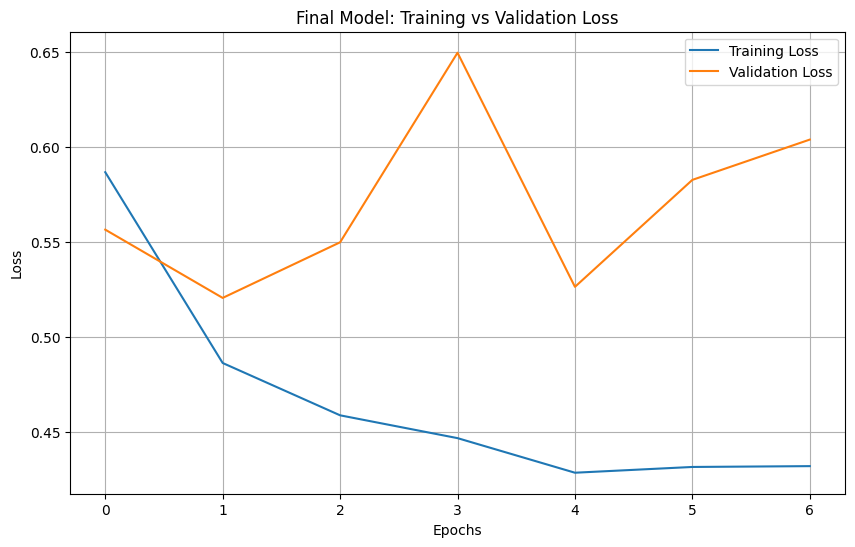

In [40]:
import matplotlib.pyplot as plt

# Plot loss from the final_history (the retrained model)
plt.figure(figsize=(10, 6))
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Final Model: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Evaluate the model on the test data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=1)

print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8031 - loss: 0.4131
Final Test Loss: 0.4407
Final Test Accuracy: 77.59%


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy Score: 0.7759


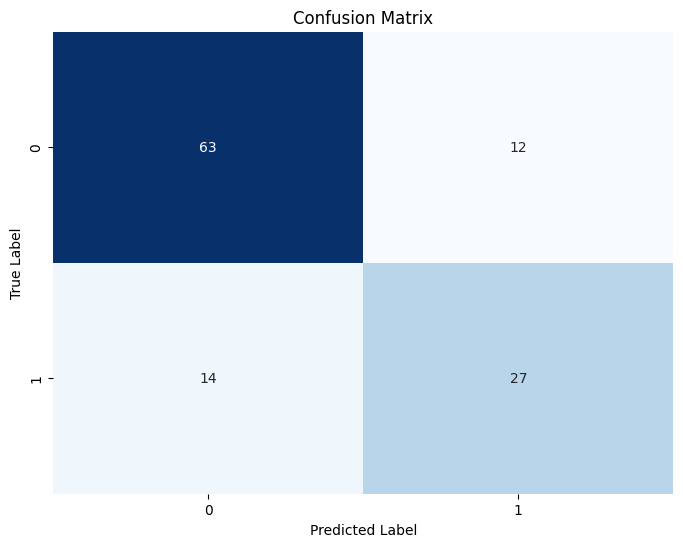

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        75
         1.0       0.69      0.66      0.68        41

    accuracy                           0.78       116
   macro avg       0.76      0.75      0.75       116
weighted avg       0.77      0.78      0.77       116



In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np

# A. Generate Predictions
y_pred_probs = final_model.predict(X_test)
# Convert probabilities to binary labels (0 or 1) based on 0.5 threshold
y_pred = (y_pred_probs > 0.5).astype("int32")

# B. Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

# C. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# D. Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))